# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
#unique_mice = mouse['Mouse ID'].value_counts()
unique_mice = mouse['Mouse ID'].nunique()
unique_mice
#print("Number of unique mice IDs:", unique_mice)



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_mouse = pd.DataFrame(mouse)
unique_mouse = unique_mouse.groupby(["Mouse ID", "Timepoint"]).size()
duplicate_mouse = unique_mouse[unique_mouse >1]
duplicate_mouse

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id = 'g989'
duplicate_mouse_data = mouse[mouse['Mouse ID'] == mouse_id]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseid_data = mouse.drop(mouse[mouse['Mouse ID'] ==mouse_id].index)
del mouse
#print("Cleaned Dataframe")
clean_mouseid_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse = clean_mouseid_data["Mouse ID"].nunique()
unique_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data = clean_mouseid_data.groupby("Drug Regimen")
mean_volume = summary_data["Tumor Volume (mm3)"].mean()
median_volume = summary_data["Tumor Volume (mm3)"].median()
variance_volume = summary_data["Tumor Volume (mm3)"].var()
standard_deviation = summary_data["Tumor Volume (mm3)"].std()
SEM = summary_data["Tumor Volume (mm3)"].sem()

summary_data = pd.DataFrame({
    #"Drug Regimen": summary_data.groups.keys(),
    "Mean  Tumor Volume": mean_volume,
    "Median Volume": median_volume,
    "Variance Volume": variance_volume,
    "Standard Deviation": standard_deviation,
    "SEM": SEM
})
summary_data

,Mean Tumor Volume,Median Volume,Variance Volume,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate = clean_mouseid_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

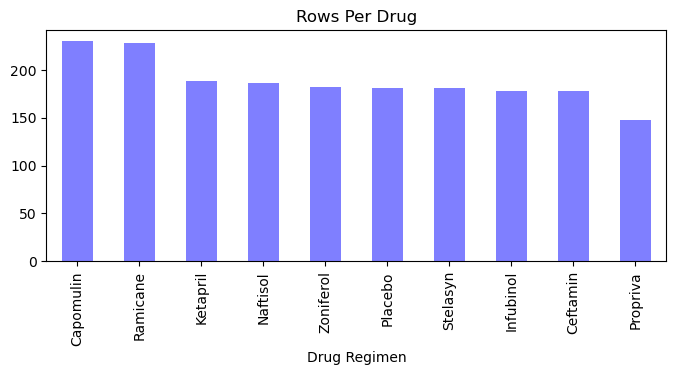

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#rows_per_drug = unique_mouse.groupby("Drug Regimen").size()
rows_per_drug = clean_mouseid_data['Drug Regimen'].value_counts()
rows_per_drug.plot(kind="bar", color="blue", alpha=0.5, figsize=(8,3),)
xlabel=("Drug Regimen")
ylabel=("# of Observed Mouse Timepoints")
plt.title("Rows Per Drug")
plt.show()



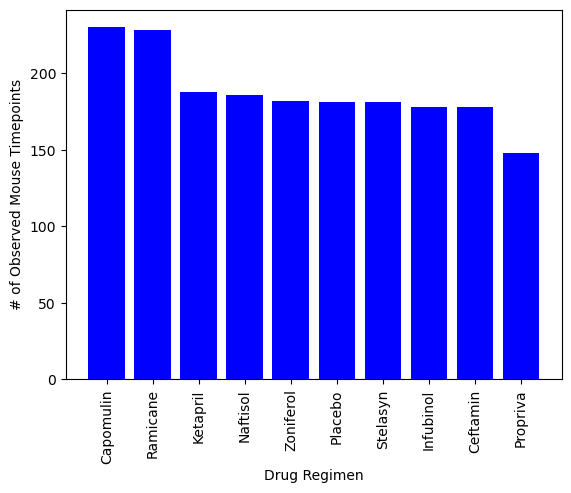

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

number_of_rows = clean_mouseid_data['Drug Regimen'].value_counts()
#drug_names = number_of_rows.sort_values(ascending=True)
drug_names = number_of_rows.index

x_axis = range(len(number_of_rows))
plt.bar(drug_names, number_of_rows, color='b', align="center")
#plt.figure(figsize=(10,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation=90)
plt.show()

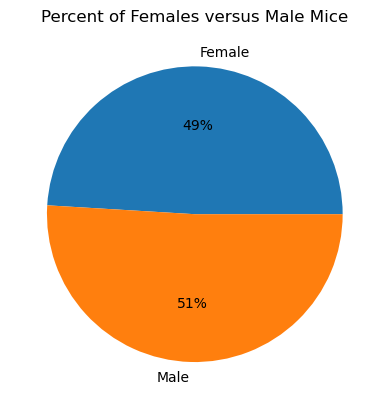

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male = clean_mouseid_data.groupby("Sex").size()
plt.pie(female_male, labels=female_male.index, autopct='%1.0f%%')
plt.title("Percent of Females versus Male Mice")
plt.show()



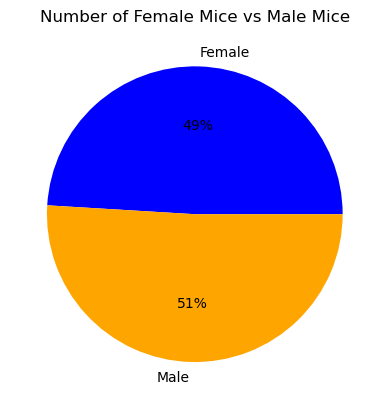

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male = clean_mouseid_data.groupby("Sex").size()
female = female_male['Female']
male = female_male['Male']

labels = ["Female", "Male"]
colors = ["blue", "orange"]
explode = [0.1, 0]  # Explode the "Female" slice

plt.pie([female, male], labels=labels,colors=colors, autopct='%1.0f%%')
plt.title("Number of Female Mice vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [14]:
#Create a DF containing only the final timepoint for each mouse
#Start by getting the last (greatest) timepoint for each mouse as a DF
last_timepoint_df = clean_mouseid_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
print(type(last_timepoint_df))
print(last_timepoint_df.shape)
last_timepoint_df.head()

<class 'pandas.core.frame.DataFrame'>
(248, 2)


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [15]:
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(clean_mouseid_data, last_timepoint_df, on=["Mouse ID", "Timepoint"])
print(final_tumor_df.shape)
final_tumor_df

(248, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [16]:
# Put treatments of interest into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data as series (for plotting)
tumor_volumes = []
# For each promising drug 
for drug in drug_regimens:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    final_tumor_volume_series = final_tumor_df.loc[final_tumor_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    # add the tumor volume series to the tumor series volume list (for plotting)
    tumor_volumes.append(final_tumor_volume_series)
    # Determine outliers using IQR, upper bound, and lower bound
    quartiles =  final_tumor_volume_series.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    lower_filter_series = final_tumor_volume_series < lower_bound
    upper_filter_series = final_tumor_volume_series > upper_bound
    outlier_series = final_tumor_volume_series[lower_filter_series | upper_filter_series]
    print(drug, outlier_series)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


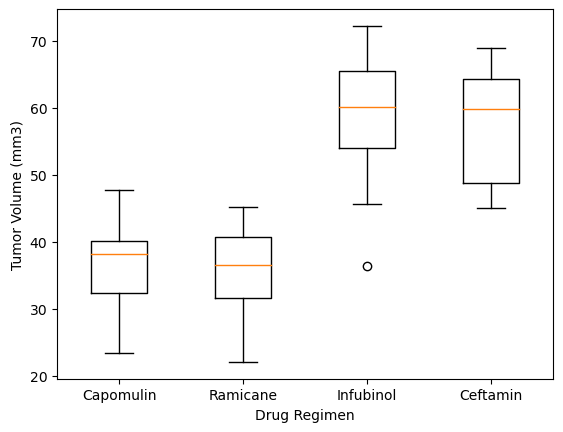

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=drug_regimens)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

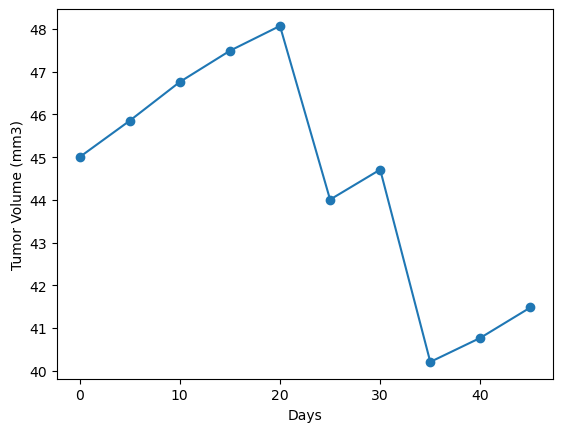

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


single_mouse_capomulin = clean_mouseid_data.loc[clean_mouseid_data["Mouse ID"] == "l509",:]
plt.plot(single_mouse_capomulin['Timepoint'], single_mouse_capomulin['Tumor Volume (mm3)'], marker='o')
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

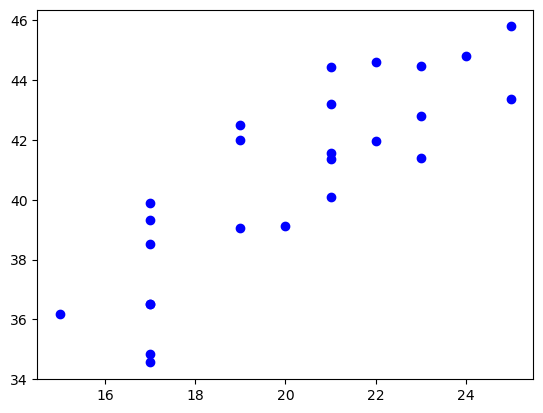

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_grouped = clean_mouseid_data.loc[clean_mouseid_data['Drug Regimen'] == 'Capomulin'].groupby("Mouse ID").aggregate({"Tumor Volume (mm3)":"mean", "Weight (g)":"mean"})

#capomulin_grouped = clean_mouseid_data.groupby("Mouse ID").aggregate({"Tumor Volume (mm3)":"mean", "Weight (g)":"mean"})
capomulin_grouped

weight = capomulin_grouped["Weight (g)"]
tumor = capomulin_grouped["Tumor Volume (mm3)"]

plt.scatter(weight, tumor, marker="o", facecolors="blue")
plt.show()

## Correlation and Regression

The correlation coefficient between weight and tumor is 0.84


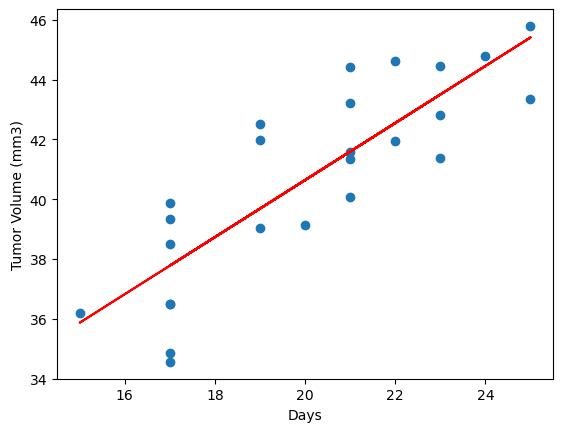

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between weight and tumor is {round(st.pearsonr(weight,tumor)[0],2)}")

x_values = capomulin_grouped["Weight (g)"]
y_values = capomulin_grouped["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.show()